# Module 3 Lab

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import dgamma
import matplotlib.pyplot as plt

In [4]:
# Read in California house-prices dataset from sklearn as a pandas dataframe
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
# View first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# View last few rows
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [6]:
# Summarize the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
# Subset the dataframe
subset_df = df.loc[range(0,50), ['MedInc', 'Population', 'MedHouseVal']]
print(subset_df.head(3))
print('The length of the new dataframe is {}'.format(len(subset_df)))

   MedInc  Population  MedHouseVal
0  8.3252       322.0        4.526
1  8.3014      2401.0        3.585
2  7.2574       496.0        3.521
The length of the new dataframe is 50


In [8]:
# Check datatypes
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [14]:
# Sample from the dataset
sample_df = df.sample(frac=0.01)
print(sample_df.head(3))
print('The length of the new dataframe is {}'.format(len(sample_df)))


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4265   1.7306      28.0  2.837097   1.154839      1463.0  2.359677     34.10   
299    2.4333      38.0  4.983051   1.121469       987.0  2.788136     37.76   
16411  4.7500      21.0  4.602740   0.931507       206.0  2.821918     37.93   

       Longitude  MedHouseVal  
4265     -118.32        4.500  
299      -122.17        0.982  
16411    -121.22        1.214  
The length of the new dataframe is 206


## Problem 3.30

**Mimic the app display of the Central Limit Theorem in Figure 3.5 by taking 10,000 simulations of a random sample of size n = 200 from a gamma distribution with μ = 10.0 and σ = 7.75. Plot the population distribution and the simulated sampling distribution of the 10,000 y values. Explain what your plots illustrate.**

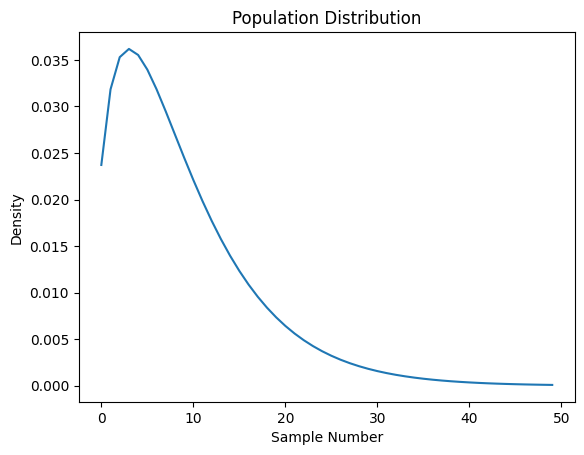

In [15]:
# Set parameters for distribution (equation 2.11)
shape = (10.0/7.75)**2
scale = (7.75**2)/10.0

# Create population distribution
y = range(1, 51)
population_dist = dgamma.pdf(y, a=shape, scale=scale)
plt.plot(population_dist)
plt.title('Population Distribution')
plt.xlabel('Sample Number')
plt.ylabel('Density')
plt.show()

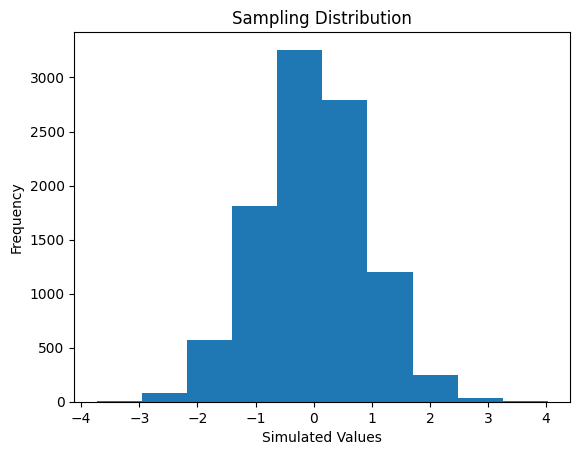

In [16]:
# Simulate 10,000 random samples of size 200 from gamma distribution
y = [np.mean(dgamma.rvs(shape, scale=scale, size=200)) for i in range(0, 10000)]
plt.hist(y)
plt.title('Sampling Distribution')
plt.xlabel('Simulated Values')
plt.ylabel('Frequency')
plt.show()

**The sampling distribution is approximately normal, by the CLT, even though the population distribution is skewed right.**